Model Accuracy: 0.72


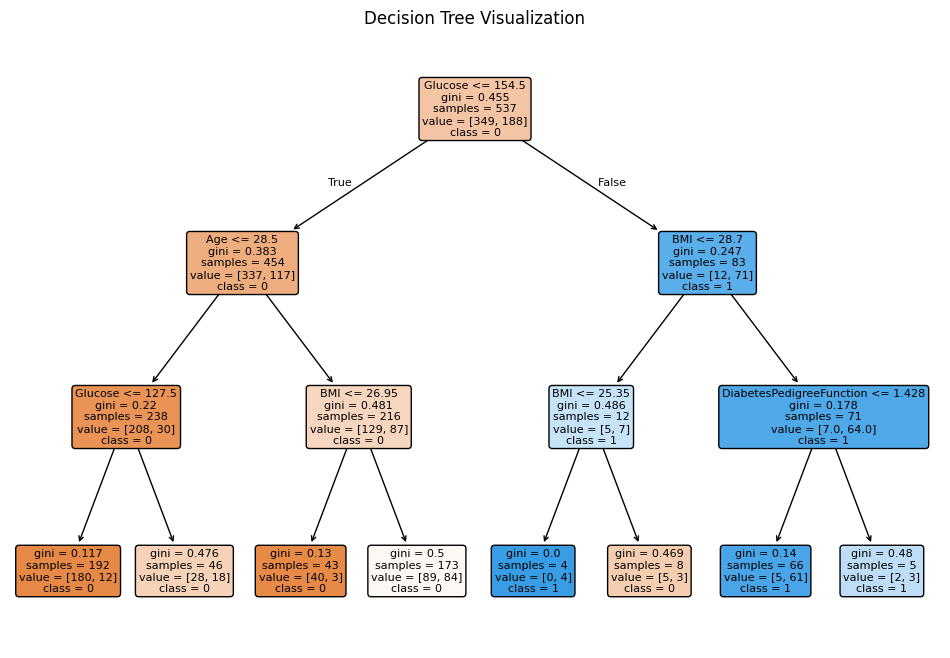

In [16]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Load a sample dataset (Iris dataset)
data = pd.read_csv("./data/diabetes.csv")
X = data.drop(["Outcome"], axis=1)  # features
y = data["Outcome"]  # labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, fontsize=8, class_names=["0", "1"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()



In [ ]:
from flaml import AutoML
from sklearn.datasets import load_iris

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1,  # in seconds
    "metric": "accuracy",
    "task": "classification",
    "log_file_name": "iris.log",
}
X_train, y_train = load_iris(return_X_y=True)
# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)
# Predict
print(automl.predict_proba(X_train))
# Print the best model
print(automl.model.estimator)